# `Project 📁` 

## Summary
Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.

#### Goal
We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank.

#### Steps
- Build a model with the maximum possible F1 score. To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set.


- Additionally, measure the AUC-ROC metric and compare it with the F1.


#### Tasks
- Download and prepare the data. Explain the procedure.


- Examine the balance of classes. Train the model without taking into account the imbalance. Briefly describe your findings.


- Improve the quality of the model. Make sure you use at least two approaches to fixing class imbalance. Use the training set to pick the best parameters. Train different models on training and validation sets. Find the best one. Briefly describe your findings.


- Perform the final testing.

# `Data description 📊`

**Path: /datasets/Churn.csv**
### Features:

> RowNumber — data string index


> CustomerId — unique customer identifier


> Surname — surname


> CreditScore — credit score


> Geography — country of residence


> Gender — gender


> Age — age


> Tenure — period of maturation for a customer’s fixed deposit (years)


> Balance — account balance


> NumOfProducts — number of banking products used by the customer


> HasCrCard — customer has a credit card


> IsActiveMember — customer’s activeness


> EstimatedSalary — estimated salary

### Target
> Exited — сustomer has left : "yes" — 1, "no" — 0

`Data Import`

In [388]:
##importing libraries

#data manipulation / formulas
import pandas as pd
import numpy as np

#classification
from sklearn.metrics import accuracy_score, auc, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_recall_curve, precision_score, recall_score, roc_auc_score, roc_curve

#regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

#splitter
from sklearn.model_selection import train_test_split

#preprocessing
from sklearn.preprocessing import Normalizer, OrdinalEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder as OHE

#utils for sampling
from sklearn.utils import shuffle

#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [389]:
##reading in the data via pandas and read_csv

try: 
    df = pd.read_csv('/Users/dani/Data Science/TripleTen Projects/Project Data/Supervised Learning/Churn.csv')
except:
    print('There is an error with your path.')

`Data Analysis`

In [390]:
##analyzing the data

print("The DataFrame's shape:",df.shape)
print('')
print("The DataFrame's structure:")
df.info()

The DataFrame's shape: (10000, 14)

The DataFrame's structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**`Findings`**

- Dtypes of the dataset seems fine
    
- RowNumber seems redundant
    
- Missing values under the Tenure feature [Placeholder - coming back to this in the case the data needs to be filled in]

In [391]:
df.shape

(10000, 14)

In [392]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [393]:
df.duplicated().sum()

0

In [394]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [395]:
df_miss = (df.isnull().sum() / len(df)) * 100
df_miss = df_miss.drop(df_miss[df_miss == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_miss})
missing_data.head(10)

,Missing Ratio
Tenure,9.09


In [396]:
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [397]:
print("The DataFrame's statistical data:")
df.describe()

The DataFrame's statistical data:


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [398]:
##taking a look at the DataFrame to gauge feature balance
display(df)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [399]:
# function to classify features
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype in ['object', 'bool', 'category']: 
            if df[column].nunique() < 15:
                categorical_features.append(column)
            else: 
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else: 
                continuous_features.append(column)
    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [400]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [401]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['Geography', 'Gender']
Non-Categorical Features: ['Surname']
Discrete Features: ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
Continuous Features: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']


In [402]:
for i in categorical:
    #print(i, ':')
    print(df[i].value_counts())
    print()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Gender
Male      5457
Female    4543
Name: count, dtype: int64



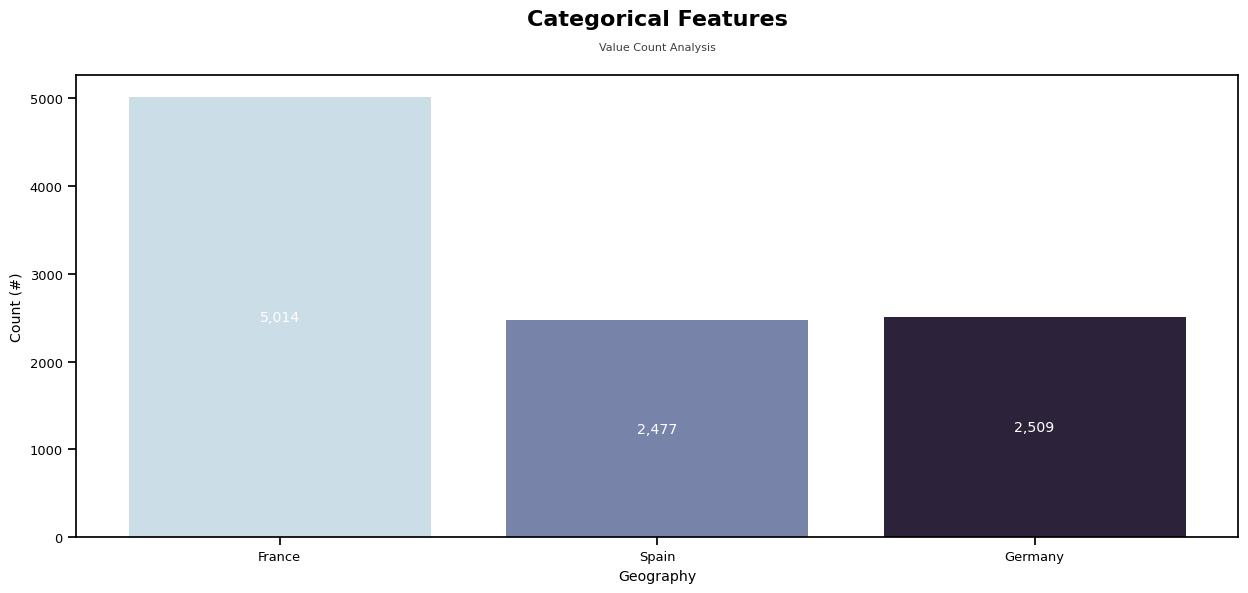

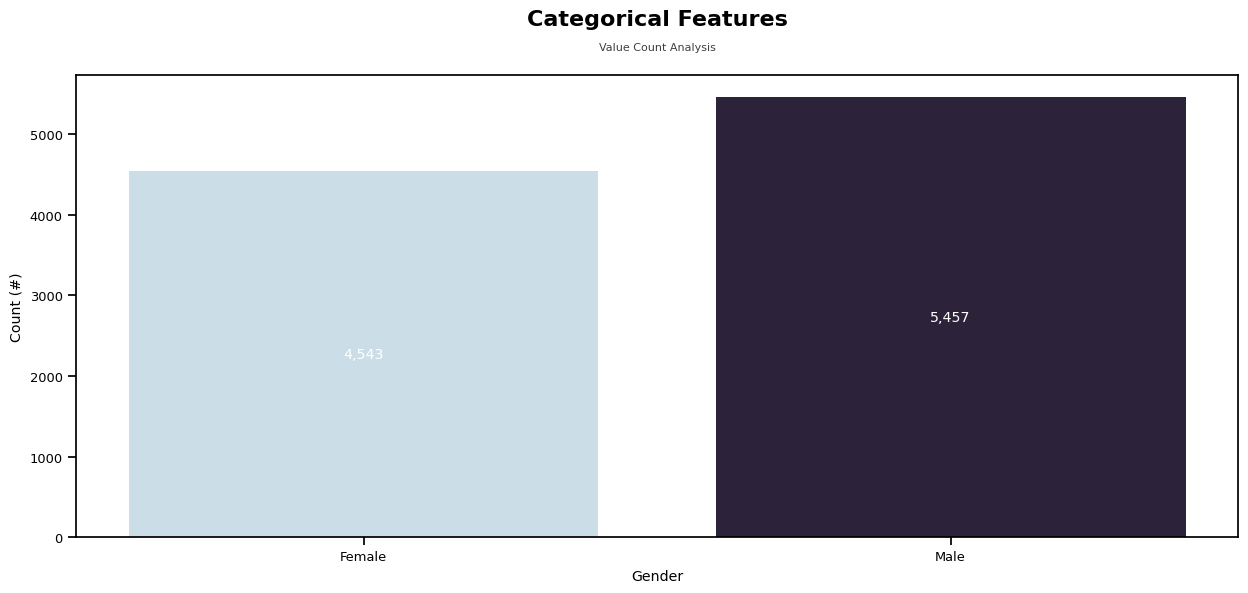

In [403]:
for i in categorical:
    fig, ax = plt.subplots(figsize=(15, 6))
    sns.countplot(x=i, data=df, palette="ch:s=.25,rot=-.25", hue=i, ax=ax)
    ax.relim()  # the plot limits need to be updated with the moved bars
    ax.autoscale()
    ax.text(x=0.5, y=1.1, s='Categorical Features', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
    ax.text(x=0.5, y=1.05, s='Value Count Analysis', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
    ax.set(ylabel='Count (#)')
    plt.xticks(rotation = None)
    bottoms = {}
    for bars in ax.containers:
        for bar in bars:
            x, y = bar.get_xy()
            h = bar.get_height()
            if x in bottoms:
                bar.set_y(bottoms[x])
                bottoms[x] += h
            else:
                bottoms[x] = h

    for c in ax.containers:
        labels = [f'{round((v.get_height())):,}' for v in c]
        ax.bar_label(c, labels=labels, label_type='center', color='white')

    plt.show()

In [404]:
for i in non_categorical:
    #print(i, ':')
    print(df[i].value_counts())
    print()

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64



In [405]:
for i in discrete:
    #print(i, ':')
    print(df[i].value_counts())
    print()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

Exited
0    7963
1    2037
Name: count, dtype: int64



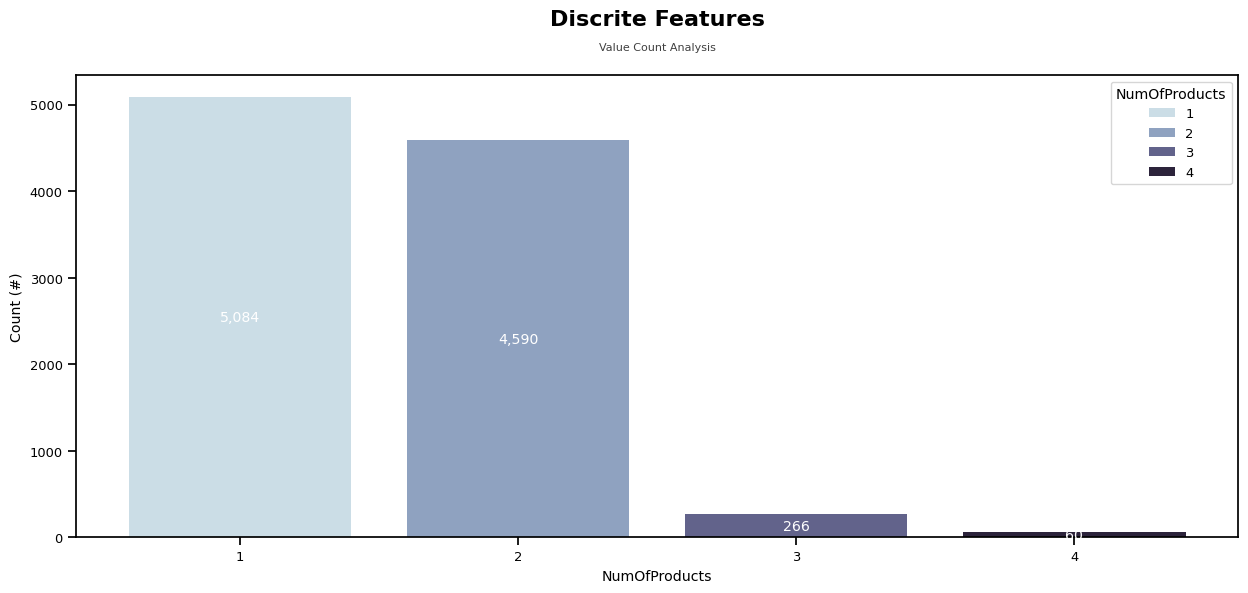

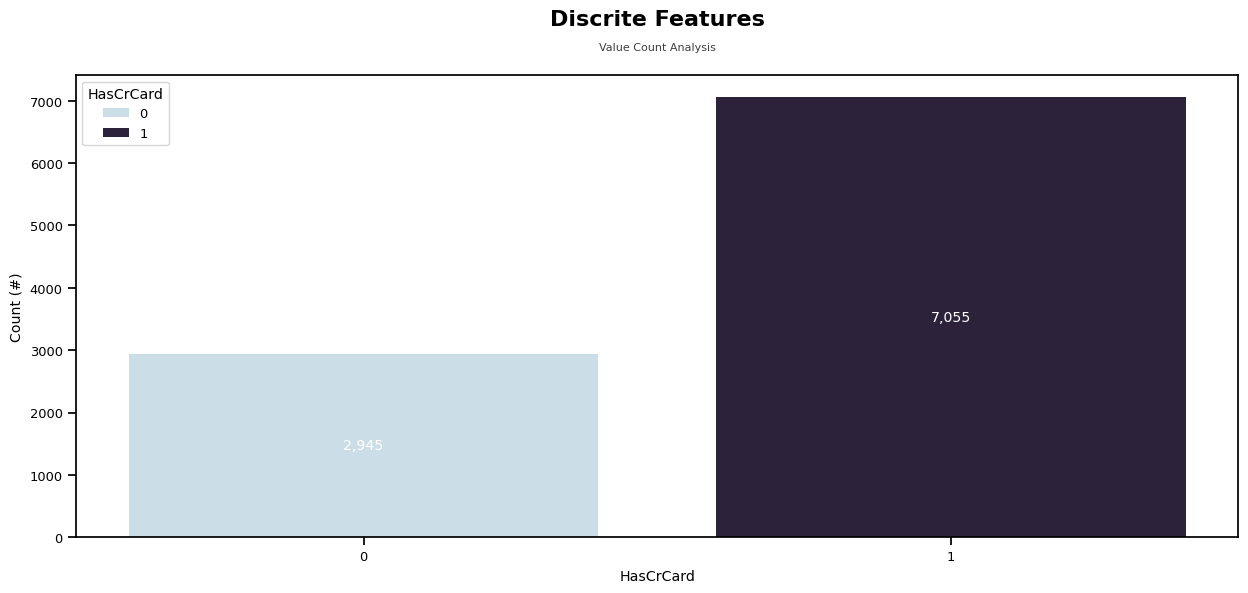

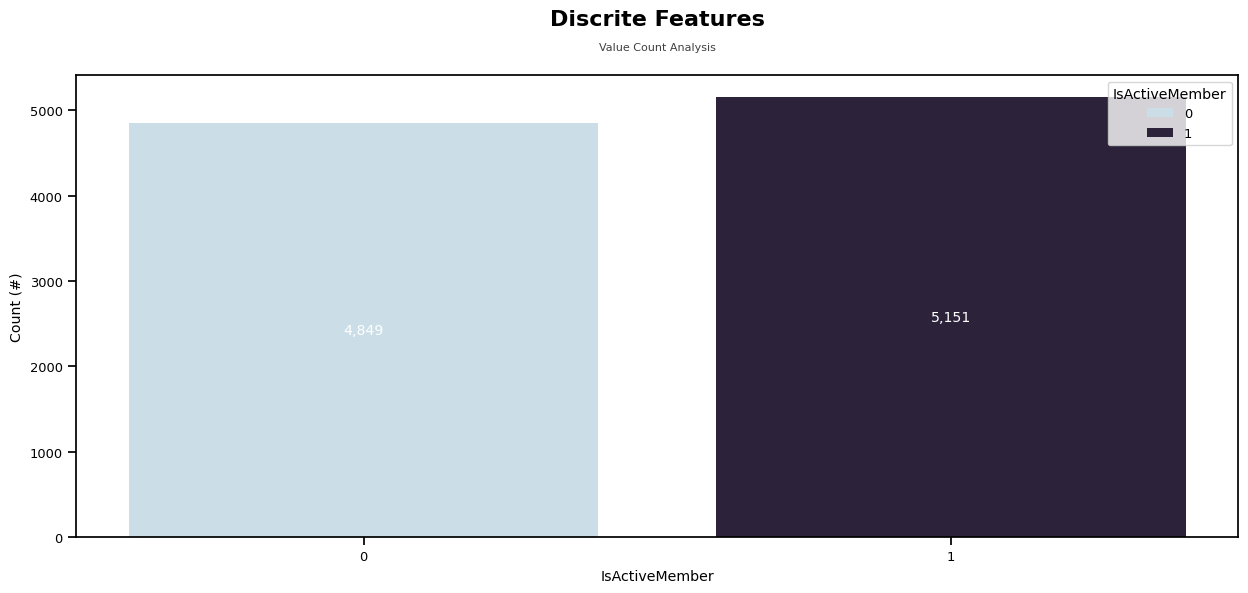

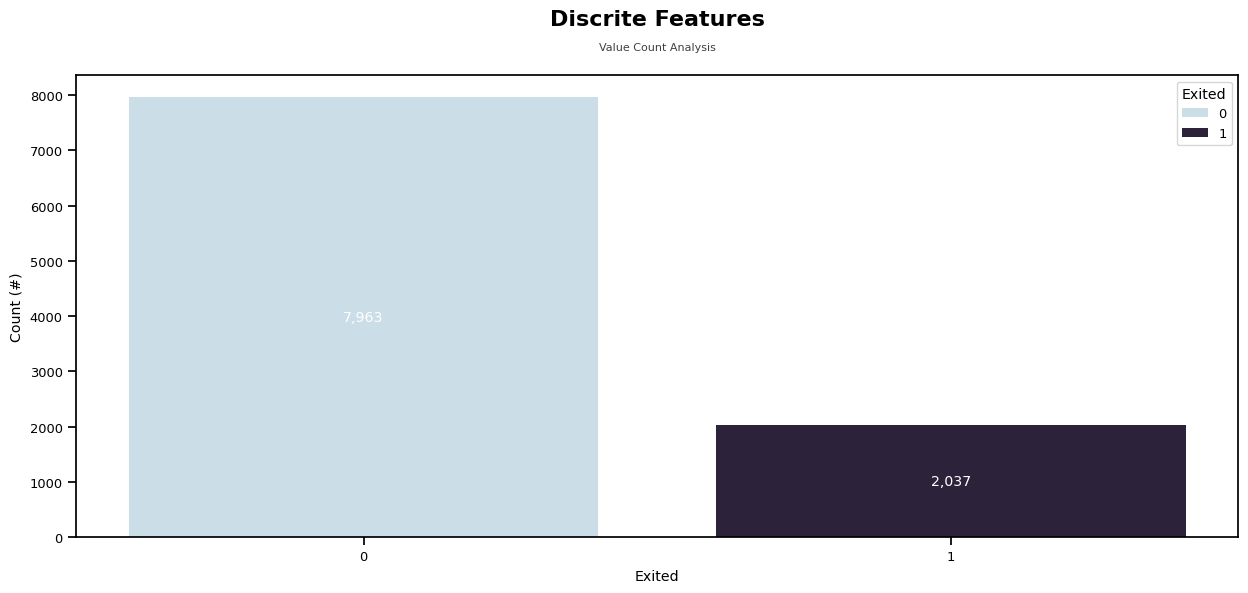

In [406]:
for i in discrete:
    fig, ax = plt.subplots(figsize=(15, 6))
    sns.countplot(x=i, data=df, palette="ch:s=.25,rot=-.25", hue=i, ax=ax)
    ax.relim()  # the plot limits need to be updated with the moved bars
    ax.autoscale()
    ax.text(x=0.5, y=1.1, s='Discrite Features', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
    ax.text(x=0.5, y=1.05, s='Value Count Analysis', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
    ax.set(ylabel='Count (#)')
    plt.xticks(rotation = None)
    bottoms = {}
    for bars in ax.containers:
        for bar in bars:
            x, y = bar.get_xy()
            h = bar.get_height()
            if x in bottoms:
                bar.set_y(bottoms[x])
                bottoms[x] += h
            else:
                bottoms[x] = h

    for c in ax.containers:
        labels = [f'{round((v.get_height())):,}' for v in c]
        ax.bar_label(c, labels=labels, label_type='center', color='white')

    plt.show()

**`Findings`**

- Can see imbalance with the magnitue of EstimatedSalary, Balance vs the other features
    
- NaN under Tenure
    

`Data Frequency`

Checking frequency:
Exited
0    0.796062
1    0.203938
Name: proportion, dtype: float64


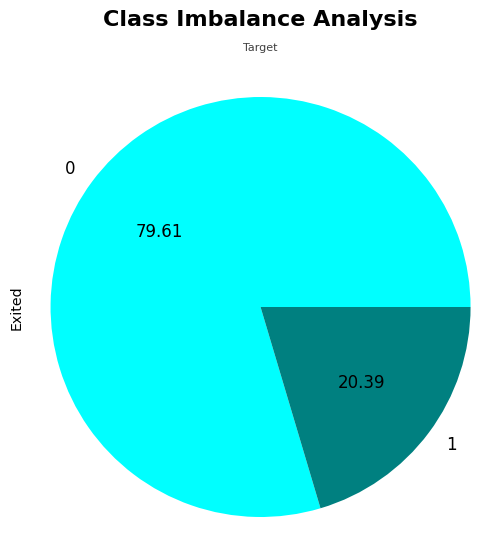

In [407]:
##splitting data into train, valid and test along with creating the features and target variables - starting off with logistic regression

#counting the number of rows that have a missing/NaN value under the Tenure feature
#display(df['Tenure'].isna().sum()) #9% of the total rows have NaN

#quick amendment to a feature producing NaN
df = df.dropna(subset=['Tenure']) #option 1
#df['Tenure'] = df['Tenure'].fillna(0) #filling in the NaN values under Tenure / option 2
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1) #attempt at removing columns to see the effects on scores
#display(df) 

class_frequency = df['Exited'].value_counts(normalize=True) #normalizing from 0 to 1
print('Checking frequency:')
print(class_frequency)

fig, ax = plt.subplots(figsize=(15, 6))
class_frequency.plot.pie(autopct='%.2f',textprops={'fontsize':12}, colors=['cyan', 'teal'], ylabel='Exited')
ax.autoscale()
ax.text(x=0.5, y=1.1, s='Class Imbalance Analysis', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Target', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
# ax.set(ylabel='Count (#)')

plt.show()

**`Findings`**

- Missing values were dealt with for the 'Tenure' feature. Statistically these missing values only count for 9% of the total instances. Filling in with 0 was another option to deploy here as there could have been the possibility of the system not assigning any value for new customers so 'Tenure' would equal to zero.

`Feature Scaling and Model Selection`

In [408]:
#OneHotEncoding for the LogisiticRegression model

data_ohe = pd.get_dummies(df, drop_first=True) #attempting to get away from the dummy trap

log_features = data_ohe.drop('Exited', axis=1) #leveraging the new dataframe with categorical feature encoding
log_target = data_ohe.Exited

log_features_train, log_features_test, log_target_train, log_target_test = train_test_split(log_features, log_target, 
                                                                            test_size=0.2, 
                                                                            random_state=12345)

log_features_train, log_features_valid, log_target_train, log_target_valid = train_test_split(log_features_train, 
                                                                              log_target_train, 
                                                                              test_size=0.25, 
                                                                              random_state=12345)

#data standardization to start
scaler = StandardScaler()

numeric = ['CreditScore', 'Balance', 'Age', 'Tenure','EstimatedSalary']

scaler.fit(log_features_train[numeric])
log_features_train[numeric] = scaler.transform(log_features_train[numeric])
log_features_valid[numeric] = scaler.transform(log_features_valid[numeric])
log_features_test[numeric] = scaler.transform(log_features_test[numeric]) #adding scaling on test set to see result


print(log_features_train.shape)
print(log_target_train.shape)
print(log_features_valid.shape) # 20%
print(log_target_valid.shape) # 20%
print(log_features_test.shape) # 20%
print(log_target_test.shape) # 20%

(5454, 11)
(5454,)
(1818, 11)
(1818,)
(1819, 11)
(1819,)


In [409]:
#Logistic Regression model training

log_model =  LogisticRegression(random_state=12345, solver='liblinear') #initializing model
log_model.fit(log_features_train, log_target_train)  # training the omdel

log_predicted_valid = log_model.predict(log_features_valid)

print('Current f1 score:', f1_score(log_target_valid, log_predicted_valid)) #unsure why this is at zero/so bad
print('Current auc score:', roc_auc_score(log_target_valid, log_predicted_valid))

Current f1 score: 0.29690721649484536
Current auc score: 0.5821760827349501


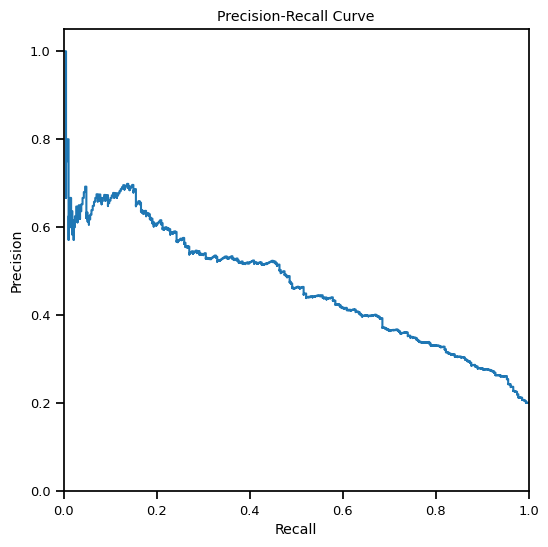

In [410]:
##Plotting the Precision-Recall Curve

log_model = LogisticRegression(random_state=12345)
log_model.fit(log_features_train, log_target_train)

probabilities_valid = log_model.predict_proba(log_features_valid)
precision, recall, thresholds = precision_recall_curve(log_target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show() 

#generating the PR curve shows that the threshold does have an effect compared to above code block

In [411]:
#calculating the AUC_ROC metric using the probabilities method

probabilities_valid = log_model.predict_proba(log_features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(log_target_valid, probabilities_one_valid)
print(auc_roc) #assuming the higher this is the more balanced the data is

0.7725165213987867


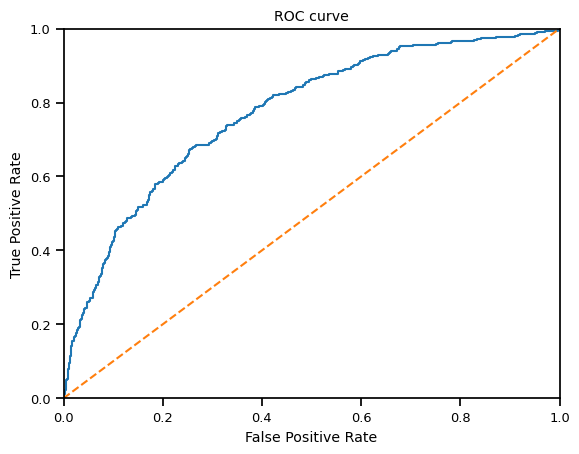

In [412]:
##Generating the ROC curve to compare TPR to FPR

fpr, tpr, thresholds = roc_curve(log_target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr,tpr)

#plot format
plt.plot([0, 1], [0, 1], linestyle='--')

#setting boundaries
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
#axis naming
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#title
plt.title('ROC curve')

plt.show() #best 'trade-off' from 0.3 to 0.4 on the FPR

In [413]:
#LabelEncoding for the Tree models

encoder = OrdinalEncoder() #initializing encoder
data_ordinal = pd.DataFrame(encoder.fit_transform(df), columns=df.columns)

tree_features = data_ordinal.drop('Exited', axis=1) #leveraging the new dataframe with categorical feature encoding
tree_target = data_ordinal.Exited

tree_features_train, tree_features_test, tree_target_train, tree_target_test = train_test_split(tree_features, 
                                                                            tree_target, 
                                                                            test_size=0.2, 
                                                                            random_state=12345)

tree_features_train, tree_features_valid, tree_target_train, tree_target_valid = train_test_split(tree_features_train, 
                                                                              tree_target_train, 
                                                                              test_size=0.25, 
                                                                              random_state=12345)
#data standardization to start
scaler = StandardScaler()

numeric = ['CreditScore', 'Balance', 'Age', 'Tenure','EstimatedSalary']
#'CreditScore', 
scaler.fit(tree_features_train[numeric])
tree_features_train[numeric] = scaler.transform(tree_features_train[numeric])
tree_features_valid[numeric] = scaler.transform(tree_features_valid[numeric])
tree_features_test[numeric] = scaler.transform(tree_features_test[numeric])


print(tree_features_train.shape)
print(tree_target_train.shape)
print(tree_features_valid.shape) # 20%
print(tree_target_valid.shape) # 20%
print(tree_features_test.shape) # 20%
print(tree_target_test.shape) # 20%

(5454, 10)
(5454,)
(1818, 10)
(1818,)
(1819, 10)
(1819,)


Current f1 score: 0.44233378561736775
Current auc score: 0.6510522512757981

Comparing vs a constant model: 0.7960620393796062

Checking frequency:
0.0    0.79593
1.0    0.20407
Name: proportion, dtype: float64


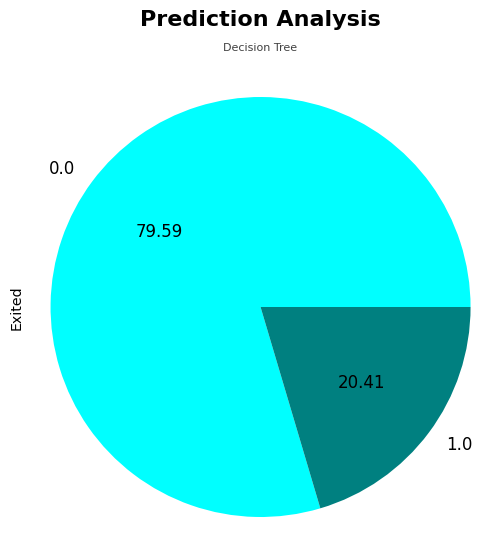

In [414]:
#Decision Tree model training

tree_model =  DecisionTreeClassifier(random_state=12345) #initializing model
tree_model.fit(tree_features_train, tree_target_train)  # training the model

tree_predicted_valid = tree_model.predict(tree_features_valid)

print('Current f1 score:', f1_score(tree_target_valid, tree_predicted_valid))
print('Current auc score:', roc_auc_score(tree_target_valid, tree_predicted_valid))
print('')

tree_predicted_valid = pd.Series(tree_model.predict(tree_features_valid))

#comparing vs a constant model
tree_target_pred_constant = pd.Series(0, index = tree_target.index)

print('Comparing vs a constant model:', accuracy_score(tree_target, tree_target_pred_constant))
print('')

#sanity check, accuracy is way too high
tree_class_frequency = tree_predicted_valid.value_counts(normalize=True) #normalizing from 0 to 1
print('Checking frequency:')
print(tree_class_frequency)

fig, ax = plt.subplots(figsize=(15, 6))
tree_class_frequency.plot.pie(autopct='%.2f',textprops={'fontsize':12}, colors=['cyan', 'teal'], ylabel='Exited', ax=ax)
ax.autoscale()
ax.text(x=0.5, y=1.1, s='Prediction Analysis', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Decision Tree', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
plt.show()


In [415]:
feature_importances = tree_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': tree_features_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance')

Top 10 Features:
           Feature  Importance
7        HasCrCard    0.015065
2           Gender    0.015538
1        Geography    0.031895
8   IsActiveMember    0.053162
4           Tenure    0.078653
6    NumOfProducts    0.118743
5          Balance    0.145817
0      CreditScore    0.149907
9  EstimatedSalary    0.169155
3              Age    0.222064


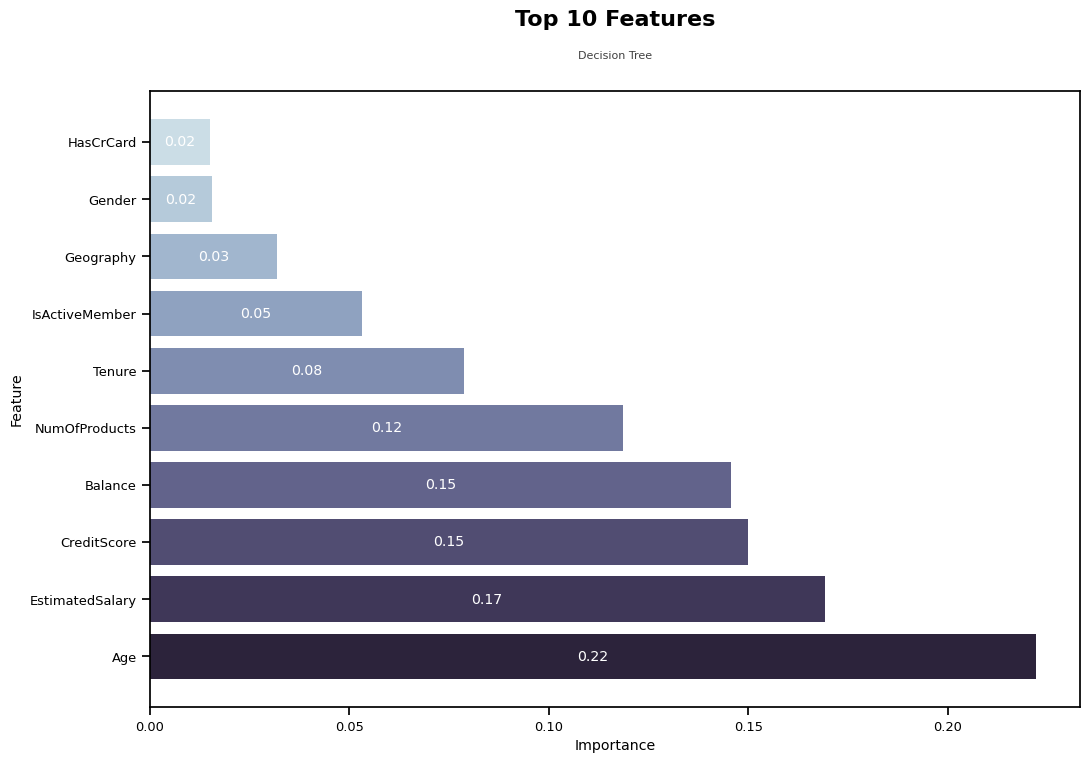

In [416]:
top_10_features = feature_importance_df.head(10)
print("Top 10 Features:")
print(top_10_features)

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data = top_10_features,
            y = 'Feature', x = 'Importance',
              palette="ch:s=.25,rot=-.25", hue='Feature',
              ax=ax)


for c in ax.containers:
    labels = [f'{( round(v.get_width(),2) )}' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', color='white')

ax.relim()  # the plot limits need to be updated with the moved bars
ax.autoscale()
ax.text(x=0.5, y=1.1, s='Top 10 Features', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Decision Tree', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

plt.xlabel('Importance')
plt.show()

Current f1 score: 0.5248226950354611
Current auc score: 0.6849681614957323

Comparing vs a constant model: 0.7960620393796062

Checking frequency:
0.0    0.891089
1.0    0.108911
Name: proportion, dtype: float64


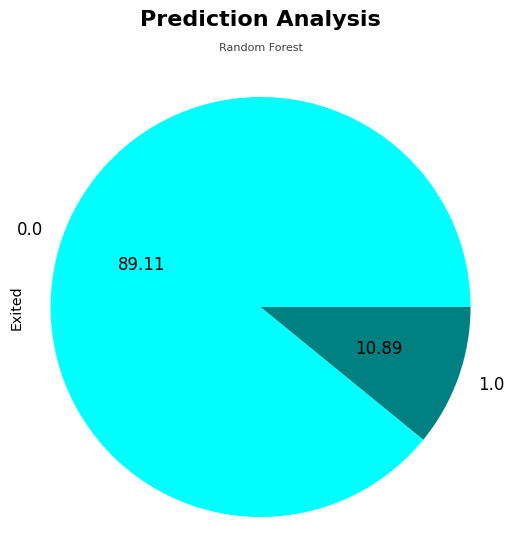

In [417]:
#RandomForest model training

forest_model =  RandomForestClassifier(random_state=12345) #initializing model
forest_model.fit(tree_features_train, tree_target_train)  # training the model

forest_predicted_valid = forest_model.predict(tree_features_valid)

print('Current f1 score:', f1_score(tree_target_valid, forest_predicted_valid))
print('Current auc score:', roc_auc_score(tree_target_valid, forest_predicted_valid))
print('')

forest_predicted_valid = pd.Series(forest_model.predict(tree_features_valid))

#comparing vs a constant model
forest_target_pred_constant = pd.Series(0, index = tree_target.index)

print('Comparing vs a constant model:', accuracy_score(tree_target, forest_target_pred_constant))
print('')

#sanity check, accuracy is way too high
forest_class_frequency = forest_predicted_valid.value_counts(normalize=True) #normalizing from 0 to 1
print('Checking frequency:')
print(forest_class_frequency)

fig, ax = plt.subplots(figsize=(15, 6))
forest_class_frequency.plot.pie(autopct='%.2f',textprops={'fontsize':12}, colors=['cyan', 'teal'], ylabel='Exited')
ax.autoscale()
ax.text(x=0.5, y=1.1, s='Prediction Analysis', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Random Forest', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
plt.show()

In [418]:
feature_importances = forest_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': tree_features_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance')

Top 10 Features:
           Feature  Importance
7        HasCrCard    0.018853
2           Gender    0.019596
1        Geography    0.037099
8   IsActiveMember    0.038182
4           Tenure    0.079880
5          Balance    0.133731
6    NumOfProducts    0.135932
0      CreditScore    0.145157
9  EstimatedSalary    0.145571
3              Age    0.245999


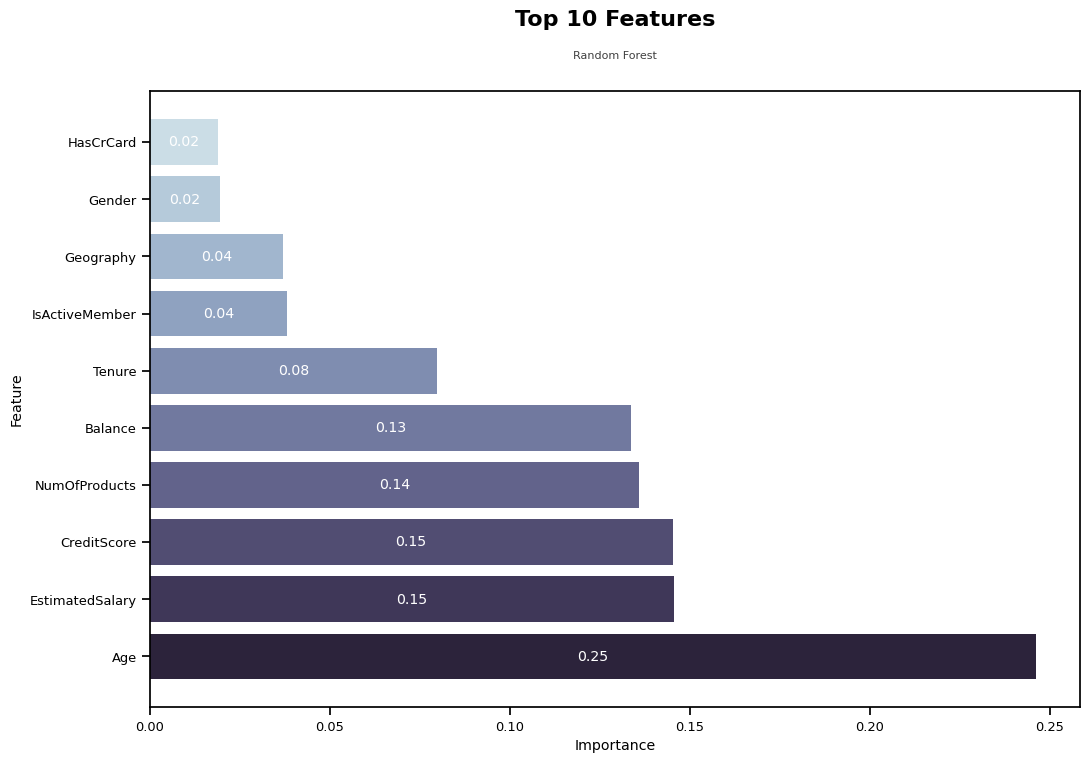

In [419]:
top_10_features = feature_importance_df.head(10)
print("Top 10 Features:")
print(top_10_features)

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data = top_10_features,
            y = 'Feature', x = 'Importance',
              palette="ch:s=.25,rot=-.25", hue='Feature',
              ax=ax)


for c in ax.containers:
    labels = [f'{( round(v.get_width(),2) )}' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', color='white')

ax.relim()  # the plot limits need to be updated with the moved bars
ax.autoscale()
ax.text(x=0.5, y=1.1, s='Top 10 Features', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Random Forest', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

plt.xlabel('Importance')
plt.show()

**`Findings`**

- Went through three models, LogisticRegression, DecisionTree and RandomForest to compare (I feel that I went about it a in a very 'long-winded' way but the practice was good).
    
- Standarized the data sets and revised in information for the Tenure column. Option 1 is to simply remove the rows and option 2 is to fill in with Zeros. Currently utilizing option 1.
    
- Created a scenario for each and calculated scores, f1 score for RandomForestClassifier was the highest.
    
- These are my pre-lim/initial findings before looking into class imbalance.

`Class Balance`

True Positives: 73 / True Negatives: 1405 / False Positives: 47 / False Negatives: 293


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1452
           1       0.61      0.20      0.30       366

    accuracy                           0.81      1818
   macro avg       0.72      0.58      0.60      1818
weighted avg       0.78      0.81      0.77      1818

Confusion Matrix:


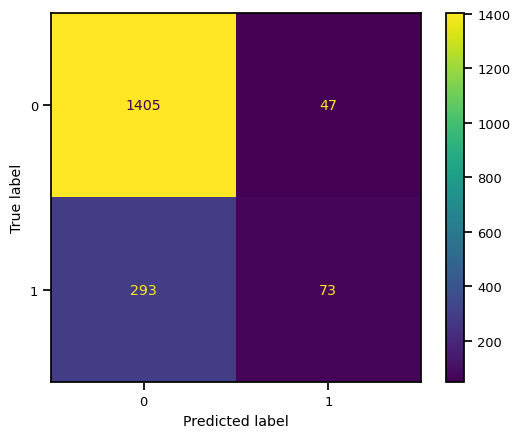

In [420]:
## Logistic Regression
## "1" is called positive, and a class labeled "0" is called negative
## "1" for those that have left the bank and "0" for those that have not

log_model =  LogisticRegression(random_state=12345) #initializing model
log_model.fit(log_features_train, log_target_train)  # training the model
log_predicted_valid = log_model.predict(log_features_valid) #predictions

TP = ((log_target_valid == 1) & (log_predicted_valid == 1)).sum()
TN = ((log_target_valid == 0) & (log_predicted_valid == 0)).sum()
FP = ((log_target_valid == 0) & (log_predicted_valid == 1)).sum()
FN = ((log_target_valid == 1) & (log_predicted_valid == 0)).sum()

print(f'True Positives: {TP} / True Negatives: {TN} / False Positives: {FP} / False Negatives: {FN}')
print('')
#print('Confusion Matrix:')
#print(confusion_matrix(tree_target_valid,tree_predicted_valid))
print('')
print('Classification Report:')
print(classification_report(log_target_valid,log_predicted_valid))

print('Confusion Matrix:')

fig, ax = plt.subplots(figsize=(12, 8))
plt.close()
sns.set_context("notebook", font_scale=.85)
cm = confusion_matrix(log_target_valid, log_predicted_valid, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=log_model.classes_)
disp.plot()

True Positives: 163 / True Negatives: 1244 / False Positives: 208 / False Negatives: 203


Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      1452
         1.0       0.44      0.45      0.44       366

    accuracy                           0.77      1818
   macro avg       0.65      0.65      0.65      1818
weighted avg       0.78      0.77      0.77      1818

Confusion Matrix:


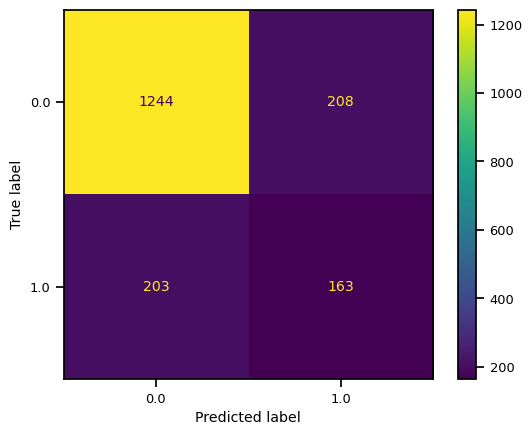

In [421]:
## Decision Tree
## "1" is called positive, and a class labeled "0" is called negative
## "1" for those that have left the bank and "0" for those that have not

tree_model =  DecisionTreeClassifier(random_state=12345) #initializing model
tree_model.fit(tree_features_train, tree_target_train)  # training the model
tree_predicted_valid = tree_model.predict(tree_features_valid) #predictions

TP = ((tree_target_valid == 1) & (tree_predicted_valid == 1)).sum()
TN = ((tree_target_valid == 0) & (tree_predicted_valid == 0)).sum()
FP = ((tree_target_valid == 0) & (tree_predicted_valid == 1)).sum()
FN = ((tree_target_valid == 1) & (tree_predicted_valid == 0)).sum()

print(f'True Positives: {TP} / True Negatives: {TN} / False Positives: {FP} / False Negatives: {FN}')
print('')
#print('Confusion Matrix:')
#print(confusion_matrix(tree_target_valid,tree_predicted_valid))
print('')
print('Classification Report:')
print(classification_report(tree_target_valid,tree_predicted_valid))

print('Confusion Matrix:')
sns.set_context("notebook", font_scale=.85)
cm = confusion_matrix(tree_target_valid, tree_predicted_valid, labels=tree_model.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=tree_model.classes_)
disp.plot()

True Positives: 148 / True Negatives: 1402 / False Positives: 50 / False Negatives: 218


Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.91      1452
         1.0       0.75      0.40      0.52       366

    accuracy                           0.85      1818
   macro avg       0.81      0.68      0.72      1818
weighted avg       0.84      0.85      0.83      1818

Confusion Matrix:


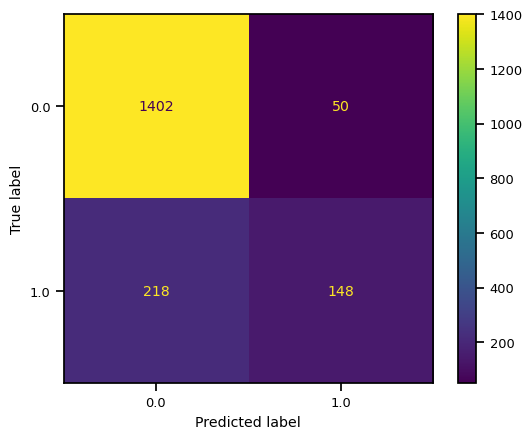

In [422]:
## RandomForest
## "1" is called positive, and a class labeled "0" is called negative
## "1" for those that have left the bank and "0" for those that have not

forest_model =  RandomForestClassifier(random_state=12345) #initializing model
forest_model.fit(tree_features_train, tree_target_train)  # training the model
forest_predicted_valid = forest_model.predict(tree_features_valid) #predictions

TP = ((tree_target_valid == 1) & (forest_predicted_valid == 1)).sum()
TN = ((tree_target_valid == 0) & (forest_predicted_valid == 0)).sum()
FP = ((tree_target_valid == 0) & (forest_predicted_valid == 1)).sum()
FN = ((tree_target_valid == 1) & (forest_predicted_valid == 0)).sum()

print(f'True Positives: {TP} / True Negatives: {TN} / False Positives: {FP} / False Negatives: {FN}')
print('')
#print('Confusion Matrix:')
#print(confusion_matrix(tree_target_valid,tree_predicted_valid))
print('')
print('Classification Report:')
print(classification_report(tree_target_valid,forest_predicted_valid))

print('Confusion Matrix:')
sns.set_context("notebook", font_scale=.85)

cm = confusion_matrix(tree_target_valid, forest_predicted_valid, labels=forest_model.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=forest_model.classes_)
disp.plot()

**`Findings`**
    
- Overall, we see a larger number of "0s" from our dataset based off of class frequency

- For binary classification only the F1 score of the positive class is used
    
LogisticRegression
- The model, as is, is giving us too many False Negatives in proportion to total Positives
    
- Our recall metric is way too low which matches the above point
    
- Precision is much higher, returning more relevant results than irrelevant ones    
    
DecisionTree
- Similar to LogisticRegression, this model gives us too many False Negatives in proportion to total Positives but slightly better than LogisticRegression
    
- Our recall metric improves but still hovers in the 'too low' category which matches the above point
    
- Precision is slightly higher compared to recall but not as high as the LogisticRegression model
    
RandomForest
- The Random Forest also gives us a higher number of False Negatives in proportion to total Positives
    
- Recall metric is a bit lower than DecisionTree which tells us it's not doing a good job of capturing Positives
    
- Precision metric this time around is definitely much higher, returning ~twice more relevant results than irrelevant ones   
    
- Lastly, the f1 score for the RandomForest comes in at the highest compared to both LogisticRegression and DecisionTree models


`Class Balance Adjustments`

***Selected Model: RandomForest***

Upsampling steps:
> Split the training sample into negative and positive observations;

> Duplicate the positive observations several times;

> Create a new training sample based on the data obtained;

> Shuffle the data: ***identical questions following one another will not help the training.***

Downsampling steps:
> Split the training sample into negative and positive observations;

> Randomly drop a portion of the negative observations;

> Create a new training sample based on the data obtained;

> Shuffle the data. ***Make sure the positive data doesn't follow the negative data: this will make it harder for the algorithms to learn.***


Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      1452
         1.0       0.78      0.39      0.52       366

    accuracy                           0.86      1818
   macro avg       0.82      0.68      0.72      1818
weighted avg       0.85      0.86      0.84      1818



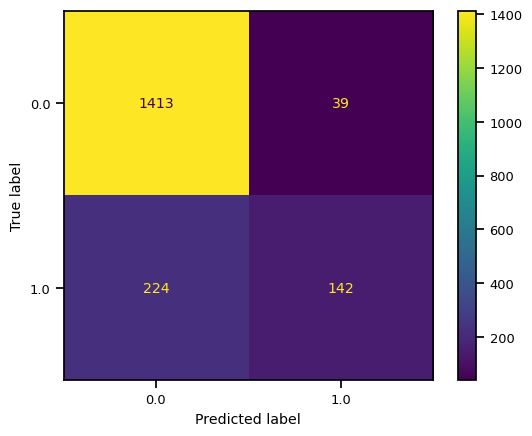

In [423]:
##introducing class weight adjustments and comparing scores

#initializing model, rare class will have a higher weight "1"
forest_model =  RandomForestClassifier(random_state=12345, class_weight='balanced').fit(tree_features_train, tree_target_train)
forest_predicted_valid = forest_model.predict(tree_features_valid) #predictions

#print('Confusion Matrix:')
#print(confusion_matrix(tree_target_valid,tree_predicted_valid))
print('')
print('Classification Report:')
print(classification_report(tree_target_valid,forest_predicted_valid))

sns.set_context("notebook", font_scale=.85)
cm = confusion_matrix(tree_target_valid, forest_predicted_valid, labels=forest_model.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=forest_model.classes_)
disp.plot()

#class weight 'balancing' doens't do much here

F1 Score: 0.5700934579439252
Checking frequency:
0.0    1542
1.0     276
Name: count, dtype: int64



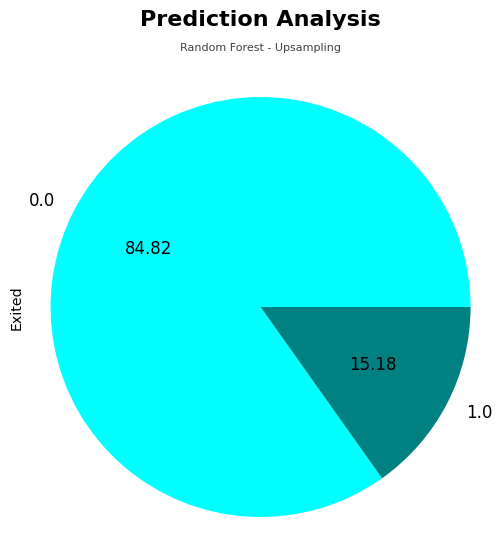

In [424]:
##Upsampling the 'rare' class which in this case is "1"
##Repetitive resampling to generate new data samples

#positive and negative observations
#features_zeros = tree_features_train[tree_target_train == 0]
#features_ones = tree_features_train[tree_target_train == 1]
#target_zeros = tree_target_train[tree_target_train == 0]
#target_ones = tree_target_train[tree_target_train == 1]

#duplication of rare class and creation of new training samples
#repeat = 10
#features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
#target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

#data shuffle/putting it all together

def upsample(features, target, repeat):
    features_zeros = tree_features_train[tree_target_train == 0]
    features_ones = tree_features_train[tree_target_train == 1]
    target_zeros = tree_target_train[tree_target_train == 0]
    target_ones = tree_target_train[tree_target_train == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(tree_features_train, tree_target_train, 4) #1620/198

#training the model with upsampled data

forest_model =  RandomForestClassifier(random_state=12345) #initializing model
forest_model.fit(features_upsampled, target_upsampled)  # training the model
forest_predicted_valid = forest_model.predict(tree_features_valid) #predictions

print('F1 Score:', f1_score(tree_target_valid, forest_predicted_valid))

#upsampling raises the score from .53 to .58 -- improvement

#balancing check
forest_predicted_valid = pd.Series(forest_model.predict(tree_features_valid))
forest_class_frequency = forest_predicted_valid.value_counts() #normalizing from 0 to 1
print('Checking frequency:')
print(forest_class_frequency)
print('')

fig, ax = plt.subplots(figsize=(15, 6))
forest_class_frequency.plot.pie(autopct='%.2f',textprops={'fontsize':12}, colors=['cyan', 'teal'], ylabel='Exited')
ax.autoscale()
ax.text(x=0.5, y=1.1, s='Prediction Analysis', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Random Forest - Upsampling', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
plt.show()

F1 Score: 0.5581896551724138
Checking frequency:
0.0    1256
1.0     562
Name: count, dtype: int64



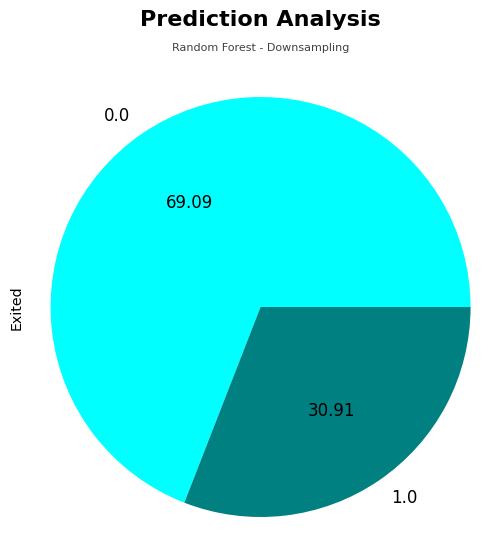

In [425]:
##Downsampling the 'common'/higher frequency class which in this case is "0"
##Repetitive resampling to generate new data samples

def downsample(features, target, fraction):
    #creating negative and positive observations
    features_zeros = tree_features_train[tree_target_train == 0]
    features_ones = tree_features_train[tree_target_train == 1]
    target_zeros = tree_target_train[tree_target_train == 0]
    target_ones = tree_target_train[tree_target_train == 1]
    
    #combining the data, reducing zeros by a fraction
    features_downsampled = pd.concat( [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat( [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    #data shuffle
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(tree_features_train, tree_target_train, 0.25) #1620/198 .13

forest_model =  RandomForestClassifier(random_state=12345) #initializing model, specifying max_depth produces a higher f1 score
forest_model.fit(features_downsampled, target_downsampled)  # training the model
forest_predicted_valid = forest_model.predict(tree_features_valid) #predictions

print('F1 Score:', f1_score(tree_target_valid, forest_predicted_valid))

#with a fraction of 0.5, we see the f1 conmtinue to climb up to .58 -- more improvement


#balancing check
forest_predicted_valid = pd.Series(forest_model.predict(tree_features_valid))
forest_class_frequency = forest_predicted_valid.value_counts() #normalizing from 0 to 1
print('Checking frequency:')
print(forest_class_frequency)
print('')

fig, ax = plt.subplots(figsize=(15, 6))
forest_class_frequency.plot.pie(autopct='%.2f',textprops={'fontsize':12}, colors=['cyan', 'teal'], ylabel='Exited')
ax.autoscale()
ax.text(x=0.5, y=1.1, s='Prediction Analysis', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Random Forest - Downsampling', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
plt.show()

In [426]:
#Model parameter tuning after performing upsampling

forest_model =  RandomForestClassifier(random_state=12345, max_depth=18, n_estimators=65, class_weight='balanced') #initializing model, specifying max_depth produces a higher f1 score
forest_model.fit(features_upsampled, target_upsampled)  # training the model
forest_predicted_valid = forest_model.predict(tree_features_valid) #predictions

print('F1 Score:', f1_score(tree_target_valid, forest_predicted_valid))

F1 Score: 0.5749235474006117


In [427]:
#Model parameter tuning after performing downsampling

forest_model =  RandomForestClassifier(random_state=12345, max_depth=18, n_estimators=60) #initializing model, specifying max_depth produces a higher f1 score
forest_model.fit(features_downsampled, target_downsampled)  # training the model
forest_predicted_valid = forest_model.predict(tree_features_valid) #predictions

print('F1 Score:', f1_score(tree_target_valid, forest_predicted_valid))

F1 Score: 0.5664864864864865


**`Findings`**
- Adjusting for the class weight doesn't really move the needle when it comes to the overall scores (especially f1), no improvement for our RandomForest model
    
- Upsampling provides the greater F1 score @ 55% vs 52% on our basecase. Downsampling yields a lower F1 Score if we get near equality in the instances for both targets (a fraction of .13) -- leveraging a slightly less even downsampling sample we can get to an F1 score of around 54-55%
    
- Through parameter tuning, we get to a F1 score of above .59 toggling max_depth, n_estimators and class_weight under the upsampling scenario
    
- Under the downsampling scenario, we toggle similar parameters but are unable to go above .54

`Classification Thresholds`

In [428]:
##Calculating probabilities based off of features of the observations

forest_model =  RandomForestClassifier(random_state=12345) #initializing model
forest_model.fit(tree_features_train, tree_target_train)  # training the model

probabilities_valid = forest_model.predict_proba(tree_features_valid)
probabilities_one_valid = probabilities_valid[:,1]

for threshold in np.arange(0, 0.5, 0.02):
    forest_predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(tree_target_valid, forest_predicted_valid)
    recall = recall_score(tree_target_valid, forest_predicted_valid)
    f1 = f1_score(tree_target_valid, forest_predicted_valid)

    print('Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}, F1 = {:.3f}'.format(threshold, precision, recall, f1))
    
#we don't see any movement when adjusting the thresholds themselves

Threshold = 0.00 | Precision = 0.215, Recall = 0.997, F1 = 0.353
Threshold = 0.02 | Precision = 0.240, Recall = 0.978, F1 = 0.385
Threshold = 0.04 | Precision = 0.263, Recall = 0.959, F1 = 0.412
Threshold = 0.06 | Precision = 0.283, Recall = 0.932, F1 = 0.434
Threshold = 0.08 | Precision = 0.306, Recall = 0.907, F1 = 0.458
Threshold = 0.10 | Precision = 0.323, Recall = 0.847, F1 = 0.467
Threshold = 0.12 | Precision = 0.346, Recall = 0.825, F1 = 0.487
Threshold = 0.14 | Precision = 0.366, Recall = 0.801, F1 = 0.502
Threshold = 0.16 | Precision = 0.395, Recall = 0.795, F1 = 0.528
Threshold = 0.18 | Precision = 0.415, Recall = 0.762, F1 = 0.538
Threshold = 0.20 | Precision = 0.442, Recall = 0.743, F1 = 0.555
Threshold = 0.22 | Precision = 0.462, Recall = 0.716, F1 = 0.562
Threshold = 0.24 | Precision = 0.489, Recall = 0.697, F1 = 0.575
Threshold = 0.26 | Precision = 0.513, Recall = 0.680, F1 = 0.585
Threshold = 0.28 | Precision = 0.527, Recall = 0.642, F1 = 0.579
Threshold = 0.30 | Precis

**`Findings`**
    
- A threshold value between .34 and .36 is the aim
    

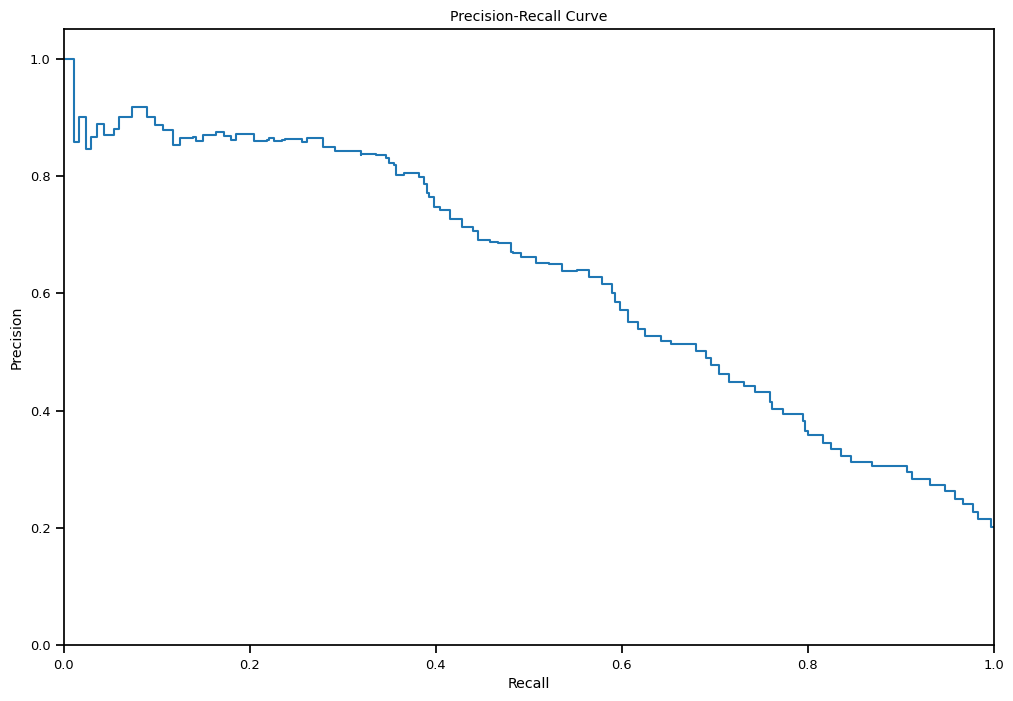

In [429]:
##Plotting the Precision-Recall Curve

forest_model = RandomForestClassifier(random_state=12345)
forest_model.fit(tree_features_train, tree_target_train)

probabilities_valid = forest_model.predict_proba(tree_features_valid)
precision, recall, thresholds = precision_recall_curve(tree_target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(12, 8))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show() 

#generating the PR curve shows that the threshold does have an effect compared to above code block

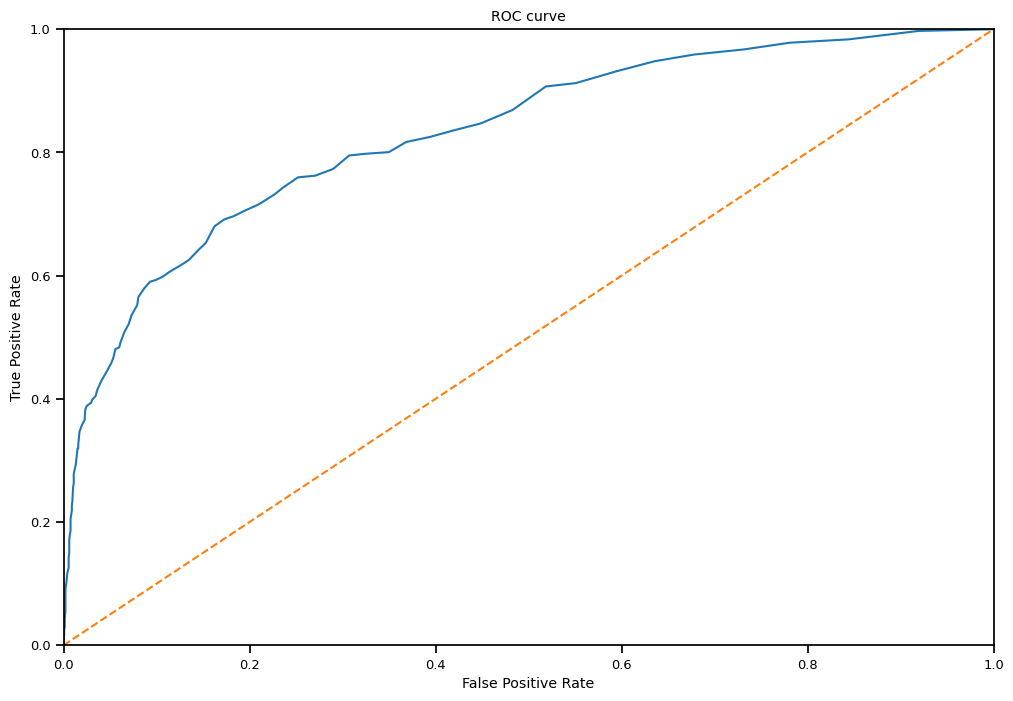

In [430]:
##Generating the ROC curve to compare TPR to FPR

fpr, tpr, thresholds = roc_curve(tree_target_valid, probabilities_one_valid)

plt.figure(figsize=(12, 8))
plt.plot(fpr,tpr)

#plot format
plt.plot([0, 1], [0, 1], linestyle='--')

#setting boundaries
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
#axis naming
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#title
plt.title('ROC curve')

plt.show() #best 'trade-off' from 0.2 to 0.4 on the FPR

In [431]:
##Generating the AUC ROC (area under the curve)

probabilities_valid = forest_model.predict_proba(tree_features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(tree_target_valid, probabilities_one_valid)
print('AUC-ROC score:', auc_roc) #assuming the higher this is the more balanced the data is

AUC-ROC score: 0.8316426184347199


`Final Model Evaluation - F1 score`

In [432]:
#Final model testing with test data sample

forest_model =  RandomForestClassifier(random_state=12345, max_depth=5, n_estimators=70, class_weight='balanced') #initializing model
forest_model.fit(features_upsampled, target_upsampled)  # training the model
forest_predicted_test = forest_model.predict(tree_features_test) #predictions

print('Final F1 Score:', f1_score(tree_target_test, forest_predicted_test))

Final F1 Score: 0.6009070294784581
